# Mínimos cuadrados lineales

Supóngase que se han realizado mediciones de un fenómeno de interés en diferentes puntos $x_i$'s resultando en cantidades $y_i$'s $\forall i=0,1,\dots, m$ (se tienen $m+1$ puntos) y además las $y_i$'s contienen un ruido aleatorio causado por errores de medición:

<img src="https://dl.dropboxusercontent.com/s/iydpi0m8ndqzb0s/mcuadrados_1.jpg?dl=0" heigth="350" width="350">


El objetivo de los mínimos cuadrados lineales es construir una curva, $f(x|\beta)$ que "mejor" se ajuste a los datos $(x_i,y_i)$, $\forall i=0,1,\dots,m$. El término de "mejor" se refiere a que la suma: $$\displaystyle \sum_{i=0}^m (y_i -f(x_i|\beta))^2$$ sea lo más pequeña posible, esto es, a que la suma de las distancias verticales entre $y_i$ y $f(x_i|\beta)$ $\forall i=0,1,\dots,m$ al cuadrado sea mínima:

<img src="https://dl.dropboxusercontent.com/s/0dhzv336jj6ep4z/mcuadrados_2.jpg?dl=0" heigth="350" width="350">


**Obs:**

* La notación $f(x|\beta)$ se utiliza para denotar que $\beta$ es un vector de parámetros a estimar, en específico $\beta_0, \beta_1, \dots \beta_n$, esto es: $n+1$ parámetros a estimar.

Si $m=3$ y $A \in \mathbb{R}^{3 \times 2}$ geométricamente el problema de mínimos cuadrados se puede visualizar con el siguiente dibujo:

<img src="https://dl.dropboxusercontent.com/s/zkbhzv9a2jiw11b/espacio_generado_columnas_de_A.png?dl=0" heigth="400" width="400">

## Modelo en mínimos cuadrados lineales

En los mínimos cuadrados lineales se supone:  $f(x|\beta) = \displaystyle \sum_{j=0}^n\beta_j\phi_j(x)$ con $\phi_j: \mathbb{R} \rightarrow \mathbb{R}$ funciones conocidas por lo que se tiene una gran flexibilidad para el proceso de ajuste.

**Obs:** 

* Si $n=m$ entonces se tiene un problema de interpolación.
* x se nombra variable **regresora**.

## ¿Cómo ajustar el modelo anterior?

En lo siguiente se **asume** $n+1 \leq m+1$ (tenemos más puntos $(x_i,y_i)$'s que parámetros a estimar).

Para realizar el ajuste de mínimos cuadrados se utilizan las ecuaciones normales: $$A^TA\beta=A^Ty$$ donde: $A$ se construye con las $\phi_j$'s evaluadas en los puntos $x_i$'s, el vector $\beta$ contiene a los parámetros $\beta_j$'s a estimar y el vector $y$, la variable **respuesta**, se construye con los puntos $y_i$'s:

$$A = \left[\begin{array}{cccc}
\phi_0(x_0) &\phi_1(x_0)&\dots&\phi_n(x_0)\\
\phi_0(x_1) &\phi_1(x_1)&\dots&\phi_n(x_1)\\
\vdots &\vdots& \vdots&\vdots\\
\phi_0(x_n) &\phi_1(x_n)&\dots&\phi_n(x_n)\\
\vdots &\vdots& \vdots&\vdots\\
\phi_0(x_{m-1}) &\phi_1(x_{m-1})&\dots&\phi_n(x_{m-1})\\
\phi_0(x_m) &\phi_1(x_m)&\dots&\phi_n(x_m)
\end{array}
\right] \in \mathbb{R}^{(m+1)x(n+1)},
\beta=
\left[\begin{array}{c}
\beta_0\\
\beta_1\\
\vdots \\
\beta_n
\end{array}
\right] \in \mathbb{R}^n,
y=
\left[\begin{array}{c}
y_0\\
y_1\\
\vdots \\
y_m
\end{array}
\right] \in \mathbb{R}^m
$$

y si $A$ es de $rank$ completo (tiene $n+1$ columnas linealmente independientes) se calcula la factorización $QR$ de $A$ : $A = QR$ y entonces: $$A^TA\beta = A^Ty$$ 

y como $A=QR$ se tiene: $A^TA = (R^TQ^T)(QR)$ y $A^T = R^TQ^T$ por lo que:

$$(R^TQ^T)(QR) \beta =  R^TQ^T y$$

y usando que $Q$ tiene columnas ortonormales:

$$R^TR\beta = R^TQ^Ty$$

Como $A$ tiene $n$ columnas linealmente independientes, la matriz $R$ es invertible por lo que $R^T$ también lo es y finalmente se tiene el sistema de ecuaciones por resolver:

$$R\beta = Q^Ty$$

# Ejemplo

In [1]:
install.packages(c("latex2exp","glmnet"),lib="/usr/local/lib/R/site-library/",
                repos="https://cran.itam.mx/")

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’




In [1]:
inc_index<-function(vec,index,h){
    '
    Auxiliary function for gradient and Hessian computation.
    Args:
        vec (double): vector
        index (int): index.
        h (float):   quantity that vec[index] will be increased.
    Returns:
        vec (double): vector with vec[index] increased by h.
    '
    vec[index]<-vec[index]+h
    vec
}

In [2]:
gradient_approximation<-function(f,x,h=1e-8){
    '
    Numerical approximation of gradient for function f using forward differences.
    Args:
        f (expression): definition of function f.
        x (double): vector that holds values where gradient will be computed.
        h (float): step size for forward differences, tipically h=1e-8
    Returns:
        gf (array): numerical approximation to gradient of f.

    '
    n<-length(x)
    gf<-vector("double",n)
    for(i in 1:n){
        gf[i]=(f(inc_index(x,i,h))-f(x))
    }
    gf/h
}

In [3]:
Hessian_approximation<-function(f,x,h=1e-6){
    '
    Numerical approximation of Hessian for function f using forward differences.
    Args:
        f (expression): definition of function f.
        x (double): vector that holds values where Hessian will be computed.
        h (float): step size for forward differences, tipically h=1e-6
    Returns:
        Hf (double): matrix of numerical approximation to Hessian of f.
    '
    n<-length(x)
    Hf<-matrix(rep(0,n^2),nrow=n,ncol=n)
    f_x<-f(x)
    for(i in 1:n){
        x_inc_in_i<-inc_index(x,i,h)
        f_x_inc_in_i<-f(x_inc_in_i)
        for(j in i:n){
            dif<-f(inc_index(x_inc_in_i,j,h))-f_x_inc_in_i-f(inc_index(x,j,h))+f_x
            Hf[i,j]<-dif
            if(j!=i)
                Hf[j,i]<-dif
        }
    }
    Hf/h^2
}

In [4]:
line_search_by_backtracking<-function(f,dir_desc,x,
                                      der_direct, alpha=.15, beta=.5){
    '
    Line search that sufficiently decreases f restricted to a ray in the direction dir_desc.
    Args:
        alpha (float): parameter in line search with backtracking, tipically .15
        beta (float): parameter in line search with backtracking, tipically .5
        f (expression): definition of function f.
        dir_desc (double): vector of descent direction.
        x (double): vector that holds values where line search will be performed.
        der_direct (float): directional derivative of f.
    Returns:
        t (float): positive number for stepsize along dir_desc that sufficiently decreases f.
    '
    t<-1
    if (alpha > 1/2){
        print('alpha must be less than or equal to 1/2')
        t <- -1
    }
    if (beta>1){
        print('beta must be less than 1')
        t <- -1
    }
    if (t!=-1){
        eval1 <- f(x+t*dir_desc)
        eval2 <- f(x) + alpha*t*der_direct
        while (eval1 > eval2){
            t<-beta*t
            eval1 <- f(x+t*dir_desc)
            eval2 <- f(x)+alpha*t*der_direct
        }
    }else
        t <- -1
    t
}

In [5]:
Euclidian_norm<-function(vec){
    sqrt(sum(vec*vec))
}

In [6]:
compute_error<-function(x_obj,x_approx){
    '
    Relative error between x_obj and x_approx.
    '
    if (Euclidian_norm(x_obj) > .Machine$double.eps){
        Err<-Euclidian_norm(x_obj-x_approx)/Euclidian_norm(x_obj)
    }else
        Err<-Euclidian_norm(x_obj-x_approx)
    Err
}

In [7]:
gradient_descent<-function(f, x_0, tol, 
                        tol_backtracking, x_ast, p_ast, maxiter){
    '
    Method of gradient descent to numerically approximate solution of min f.
    Args:
        f (expression): definition of function f.
        x_0 (double): vector of initial point for gradient descent method.
        tol (float): tolerance that will halt method. Controls norm of gradient of f.
        tol_backtracking (float): tolerance that will halt method. Controls value of line search by backtracking.
        x_ast (double): vector solution of min f, now its required that user knows the solution...
        p_ast (double): vector value of f(x_ast), now its required that user knows the solution...
        maxiter (int): maximum number of iterations
    Returns:
        x (double): vector approximation of x_ast.
        iteration (int): number of iterations.
        Err_plot (double): vector array of absolute error between p_ast and f(x) with x approximation.
                          of x_ast. Useful for plotting.
        x_plot (double): vector array that containts in columns vector of approximations. Last column
                        contains x, approximation of solution. Useful for plotting.
    '
    iteration <- 1
    x <- x_0
    
    feval <- f(x)
    gfeval <- gradient_approximation(f,x)

    normgf <- Euclidian_norm(gfeval)
    
    Err_plot_aux <- vector("double",maxiter)
    Err_plot_aux[iteration] <- abs(feval-p_ast)
    
    Err <- compute_error(x_ast,x)
    n <- length(x)
    x_plot <- matrix(0,nrow=n,ncol=maxiter)
    x_plot[,iteration] <- x
    
    cat(sprintf("I    Normagf   Error x_ast   Error p_ast   line search\n"))
    cat(sprintf("%d    %.2e   %0.2e      %0.2e      %s\n",iteration,normgf,Err,Err_plot_aux[iteration],"---"))
    iteration<-iteration + 1
    while(normgf>tol && iteration <= maxiter){
        dir_desc <- -gfeval
        der_direct <- sum(gfeval*dir_desc)
        t <- line_search_by_backtracking(f,dir_desc,x,der_direct)
        x <- x + t*dir_desc
        feval <- f(x)
        gfeval <- gradient_approximation(f,x)
        normgf <- Euclidian_norm(gfeval)
        Err_plot_aux[iteration] <- abs(feval-p_ast);
        x_plot[,iteration] <- x
        Err <- compute_error(x_ast,x)
        cat(sprintf("%d    %.2e   %0.2e      %0.2e      %s\n",iteration,normgf,Err,Err_plot_aux[iteration],t))
        if (t<tol_backtracking){ #if t is less than tol_backtracking then we need to check the reason
            iter_salida <- iteration
            iteration <- maxiter
        }
        iteration <- iteration + 1
    } #while
    cat(sprintf("Error of x with respect to x_ast: %.2e\n",Err))
    cat(sprintf("Approximate solution:"))
    print(x)
    cond <- Err_plot_aux > .Machine$double.eps*10**(-2)
    Err_plot = Err_plot_aux[cond]
    cond<- apply(x_plot,2,function(x) all(x==0))
    x_plot <- x_plot[,!cond]
    if (iteration == maxiter && t < tol_backtracking){
        print("Backtracking value less than tol_backtracking, check approximation")
        iteration<-iter_salida
    }
   list(x,iteration-1,Err_plot,x_plot)
    
}    

In [8]:
library(ggplot2)
library(latex2exp)
library(glmnet)
library(magrittr)
library(dplyr)

Loading required package: Matrix

Loaded glmnet 3.0-2



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




1) $$\min \quad \frac{1}{2}y^Ty-\beta^TA^Ty + \frac{1}{2}\beta^TA^TA\beta$$

In [9]:
set.seed(1989) #para reproducibilidad
mpoints <- 20
df <-  data.frame(x=rnorm(mpoints))
y <- -3*df$x + rnorm(mpoints,2,1)
df$y <- y

In [10]:
gg <- ggplot(data=df, aes(x=x, y=y))

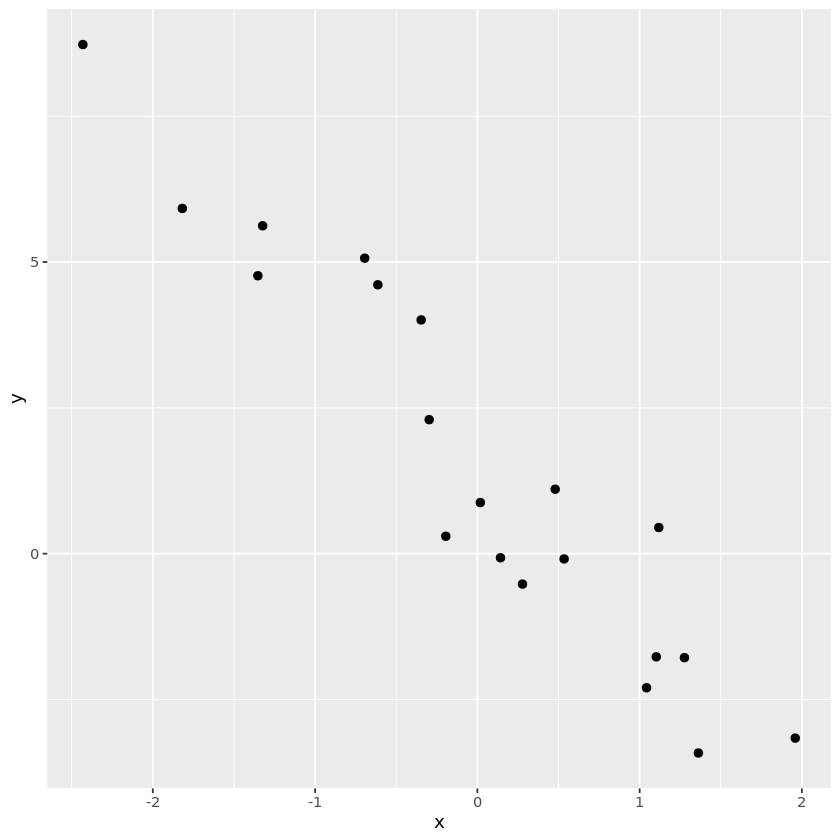

In [11]:
gg + 
geom_point(aes(x=x,y=y),size=2)

In [12]:
linear_model <- lm(df$y~df$x)

In [13]:
linear_model$coefficients

(Intercept)        df$x 
   1.565663   -2.810582

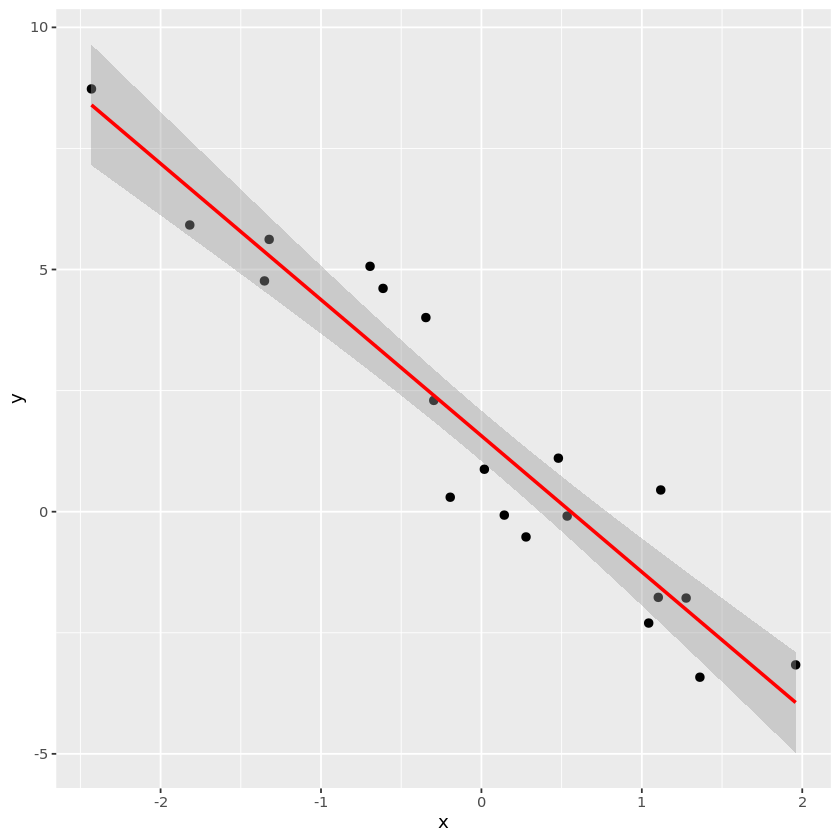

In [14]:
gg +
geom_point(aes(x=x,y=y),size=2) +
geom_smooth(method='lm',colour='red')

Método de descenso gradiente con $\beta_0=(0,0)^T$:

1) $$\min \quad \frac{1}{2}y^Ty-\beta^TA^Ty + \frac{1}{2}\beta^TA^TA\beta$$

In [15]:
cte <- sum(y*y)

In [16]:
A <- matrix(c(rep(1,mpoints),df$x),nrow=mpoints)

In [17]:
fo <-function(beta)1/2*cte - sum(beta*(t(A)%*%y)) + 1/2*sum(beta*(t(A)%*%(A%*%beta)))


In [18]:
beta_0 <- matrix(c(0,0),nrow=2)

In [19]:
beta_ast <- c(linear_model$coefficients[1],linear_model$coefficients[2])


In [20]:
beta_ast

(Intercept)        df$x 
   1.565663   -2.810582

In [21]:
p_ast <- fo(beta_ast)

In [22]:
p_ast

[1] 11.1175

In [23]:
tol <- 1e-8
tol_backtracking <- 1e-14
maxiter <- 30
p_ast <- fo(beta_ast)


In [24]:
l<-gradient_descent(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search
1    7.73e+01   1.00e+00      1.24e+02      ---
2    4.17e+01   5.17e-01      3.46e+01      0.0625
3    2.41e+01   2.95e-01      1.14e+01      0.0625
4    1.41e+01   1.73e-01      3.91e+00      0.0625
5    8.27e+00   1.01e-01      1.35e+00      0.0625
6    4.86e+00   5.95e-02      4.65e-01      0.0625
7    2.85e+00   3.49e-02      1.60e-01      0.0625
8    1.68e+00   2.05e-02      5.53e-02      0.0625
9    9.84e-01   1.20e-02      1.91e-02      0.0625
10    5.78e-01   7.07e-03      6.58e-03      0.0625
11    3.39e-01   4.15e-03      2.27e-03      0.0625
12    1.99e-01   2.44e-03      7.83e-04      0.0625
13    1.17e-01   1.43e-03      2.70e-04      0.0625
14    6.88e-02   8.42e-04      9.31e-05      0.0625
15    4.04e-02   4.94e-04      3.21e-05      0.0625
16    2.37e-02   2.90e-04      1.11e-05      0.0625
17    1.39e-02   1.70e-04      3.82e-06      0.0625
18    8.19e-03   1.00e-04      1.32e-06      0.0625
19    4.81e-03   5.89

In [25]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


In [26]:
print(beta)

          [,1]
[1,]  1.565663
[2,] -2.810582


In [27]:
print(beta_ast)

(Intercept)        df$x 
   1.565663   -2.810582 


In [28]:
gg <- ggplot()

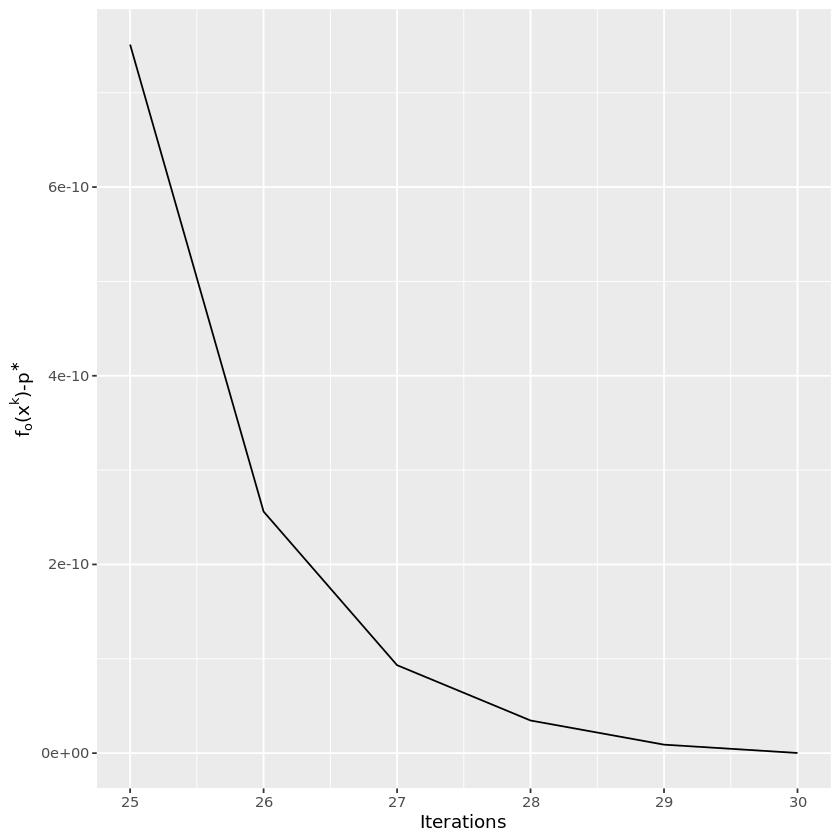

In [29]:
gg +
geom_line(aes(x=25:total_of_iterations,y=Err_plot[25:length(Err_plot)])) + 
xlab('Iterations') + ylab(TeX('f_o(x^k)-p^*'))


# Regularización

Penalización lasso

In [30]:
Hessian_evaluation<-function()1/mpoints*t(A)%*%A

In [31]:
gf_evaluation<- function(beta) 1/mpoints * t(A)%*%(A%*%beta-y) + reg*sign(beta)

In [32]:
Newtons_method<-function(f, x_0, tol, 
                        tol_backtracking, x_ast, p_ast, maxiter){
    '
    Method of gradient descent to numerically approximate solution of min f.
    Args:
        f (expression): definition of function f.
        x_0 (double): vector of initial point for gradient descent method.
        tol (float): tolerance that will halt method. Controls norm of gradient of f.
        tol_backtracking (float): tolerance that will halt method. Controls value of line search by backtracking.
        x_ast (double): vector solution of min f, now its required that user knows the solution...
        p_ast (double): vector value of f(x_ast), now its required that user knows the solution...
        maxiter (int): maximum number of iterations
    Returns:
        x (double): vector approximation of x_ast.
        iteration (int): number of iterations.
        Err_plot (double): vector array of absolute error between p_ast and f(x) with x approximation.
                          of x_ast. Useful for plotting.
        x_plot (double): vector array that containts in columns vector of approximations. Last column
                        contains x, approximation of solution. Useful for plotting.
    '
    iteration <- 1
    x <- x_0
    
    feval <- f(x)
    gfeval <- gradient_approximation(f,x)
    Hfeval <- Hessian_approximation(f,x)
    #condHf <- np.linalg.cond(Hfeval)
    
    normgf <- Euclidian_norm(gfeval)
    
    Err_plot_aux <- vector("double",maxiter)
    Err_plot_aux[iteration] <- abs(feval-p_ast)
    
    Err <- compute_error(x_ast,x)
    n <- length(x)
    x_plot <- matrix(0,nrow=n,ncol=maxiter)
    x_plot[,iteration] <- x
    
    #Newton's direction and Newton's decrement
    dir_Newton <- solve(Hfeval, gfeval)
    dec_Newton <- sum(dir_Newton*(Hfeval%*%dir_Newton))
    dir_Newton <- -dir_Newton
    
    cat(sprintf("I    Normagf   Error x_ast   Error p_ast   line search\n"))
    cat(sprintf("%d    %.2e   %0.2e      %0.2e      %s\n",iteration,normgf,Err,Err_plot_aux[iteration],"---"))
    
    stopping_criteria <- dec_Newton/2
    iteration<-iteration + 1
    while(stopping_criteria>tol && iteration <= maxiter){
        der_direct <- -dec_Newton
        t <- line_search_by_backtracking(f,dir_Newton,x,der_direct)
        x <- x + t*dir_Newton
        feval <- f(x)
        gfeval <- gradient_approximation(f,x)
        Hfeval <- Hessian_approximation(f,x)
        normgf <- Euclidian_norm(gfeval)
        #Newton's direction and Newton's decrement
        dir_Newton = solve(Hfeval, gfeval)
        dec_Newton = sum(dir_Newton*(Hfeval%*%dir_Newton))
        dir_Newton <- -dir_Newton
        Err_plot_aux[iteration] <- abs(feval-p_ast);
        x_plot[,iteration] <- x
        Err <- compute_error(x_ast,x)
        cat(sprintf("%d    %.2e   %0.2e      %0.2e      %s\n",iteration,normgf,Err,Err_plot_aux[iteration],t))
        stopping_criteria = dec_Newton/2
        if (t<tol_backtracking){ #if t is less than tol_backtracking then we need to check the reason
            iter_salida <- iteration
            iteration <- maxiter
        }
        iteration <- iteration + 1
    } #while
    cat(sprintf("Error of x with respect to x_ast: %.2e\n",Err))
    cat(sprintf("Approximate solution:"))
    print(x)
    cond <- Err_plot_aux > .Machine$double.eps*10**(-2)
    Err_plot = Err_plot_aux[cond]
    cond<- apply(x_plot,2,function(x) all(x==0))
    x_plot <- x_plot[,!cond]
    if (iteration == maxiter && t < tol_backtracking){
        print("Backtracking value less than tol_backtracking, check approximation")
        iteration<-iter_salida
    }
   list(x,iteration-1,Err_plot,x_plot)
    
}    

In [33]:
reg<-.5

In [34]:
quita_signo<-function(beta){
    beta<-sign(beta)*beta
    ind <- beta ==0
    beta[ind] <- .Machine$double.xmin 
    beta
    }

In [35]:
fo <-function(beta)1/mpoints*(1/2*cte - sum(beta*(t(A)%*%y)) + 1/2*sum(beta*(t(A)%*%(A%*%beta)))) + reg*sum(quita_signo(beta))


In [36]:
beta_0<-c(0,2)

In [37]:
gf_evaluation(beta_0)

-1.507055
6.587020


In [38]:
gradient_approximation(fo,beta_0)

[1] -1.007055  6.587020

In [39]:
beta_0 <- matrix(c(0,0),nrow=2)

In [40]:
gradient_approximation(fo,beta_0)

[1] -1.031421  4.048410

In [41]:
gf_evaluation(beta_0)

-1.531421
3.548410


In [42]:
fit <- glmnet(A,y,alpha=1,lambda=reg,standardize=F,nlambda=1,thresh=1e-8)

In [43]:
print(as.matrix(fit$beta))

          s0
V1  0.000000
V2 -2.416619


In [44]:
beta_ast <- as.matrix(fit$beta)


In [45]:
beta_ast

,s0
V1,0.000000
V2,-2.416619


In [46]:
p_ast <- fo(beta_ast)

In [47]:
p_ast

[1] 3.080822

In [48]:
beta_0<-c(0,0)

In [49]:
tol <- 1e-8
tol_backtracking <- 1e-14
maxiter <- 30
p_ast <- fo(beta_ast)


In [50]:
Hessian_approximation(fo,beta_0)

0.99920072,0.01154632
0.01154632,1.26831878


In [51]:
Hessian_evaluation()

1.00000000,0.01218318
0.01218318,1.26930474


In [52]:
l<-Newtons_method(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search
1    4.18e+00   1.00e+00      3.66e+00      ---
2    1.00e+00   5.49e-01      1.67e-01      1
3    3.28e-03   4.40e-01      5.63e-01      1
4    2.29e-06   4.39e-01      5.63e-01      1
Error of x with respect to x_ast: 4.39e-01
Approximate solution:[1]  1.060803 -2.411821


In [53]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


In [54]:
print(beta)

[1]  1.060803 -2.411821


In [55]:
print(beta_ast)

          s0
V1  0.000000
V2 -2.416619


In [56]:
fo(beta)

[1] 2.518092

In [57]:
beta_plot

1.069243,1.063071,1.060803
-3.201684,-2.413724,-2.411821


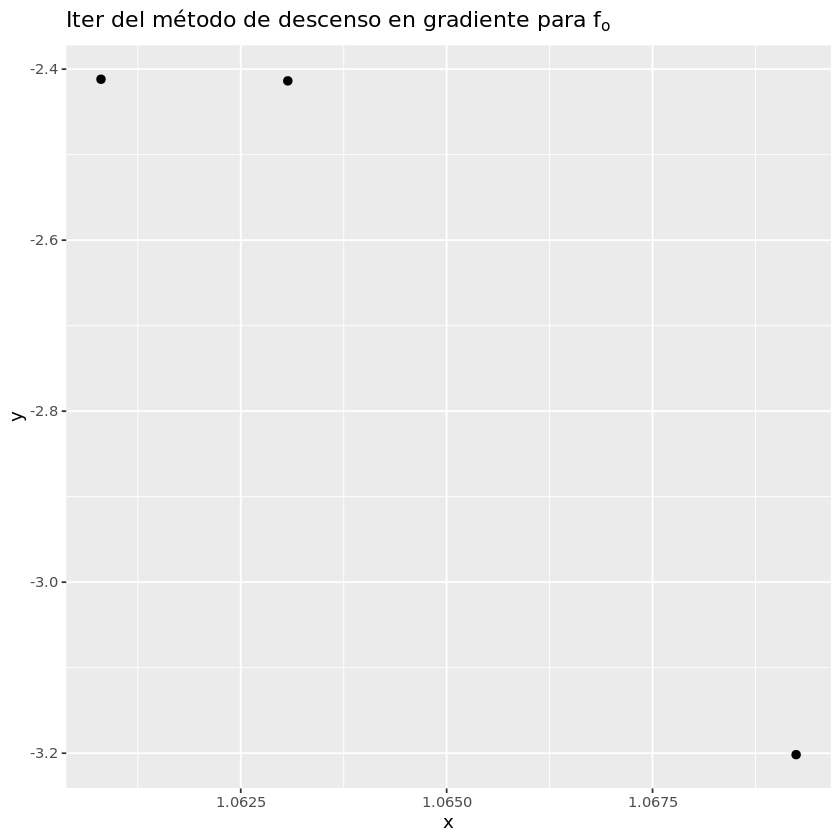

In [58]:
gg +
geom_point(aes(x=beta_plot[1,],y=beta_plot[2,]),size=2) +
#annotate(geom='text', x=0.5, y=0.47, 
#         label=TeX("x^{(0)}", output='character'), parse=TRUE) + 
xlab('x') + ylab('y') + 
ggtitle(TeX('Iter del método de descenso en gradiente para $f_o$'))

Modelo sin intercepto

In [59]:
y <- mtcars %>% select(mpg) %>% as.matrix()
X <- mtcars %>% select(-mpg) %>% as.matrix()

In [60]:
A<-X[,c(2,4)]

In [61]:
cte <- sum(y*y)
mpoints<-nrow(A)

In [62]:
cte

[1] 14042.31

In [63]:
mpoints

[1] 32

In [64]:
fit <- glmnet(A,y,alpha=1,lambda=reg,standardize=F,nlambda=1,intercept=F,thresh=1e-8)

In [65]:
beta_ast <- as.matrix(fit$beta)


In [66]:
print(beta_ast)

              s0
disp -0.01682177
drat  6.59053287


In [67]:
beta_0<-c(1,1)

**Newtons method**

In [68]:
gradient_approximation(fo,beta_0)

[1] 64876.0375   723.5409

In [69]:
gf_evaluation(beta_0)

disp,64876.0371
drat,723.5409


In [70]:
Hessian_approximation(fo,beta_0)

68106.6012,774.889486
774.8895,3.637979


In [71]:
Hessian_evaluation()

,disp,drat
disp,68113.3584,784.21238
drat,784.2124,13.21221


In [72]:
beta_0

[1] 1 1

In [73]:
l<-Newtons_method(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search
1    6.49e+04   8.62e-01      3.10e+04      ---
2    4.89e+01   1.28e+00      1.56e+02      1
3    1.42e+00   4.42e-02      6.87e+00      1
4    2.95e-02   8.68e-04      6.70e+00      1
5    3.69e-04   1.65e-05      6.70e+00      1
Error of x with respect to x_ast: 1.65e-05
Approximate solution:[1] -0.01682385  6.59064139


In [74]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


In [75]:
print(beta)

[1] -0.01682385  6.59064139


In [76]:
print(beta_ast)

              s0
disp -0.01682177
drat  6.59053287


In [77]:
fo(beta)

[1] 9.777368

In [78]:
beta_plot

1,0.07949562,-0.02019068,-0.01675652,-0.01682385
1,-1.81796641,6.88212076,6.58481401,6.59064139


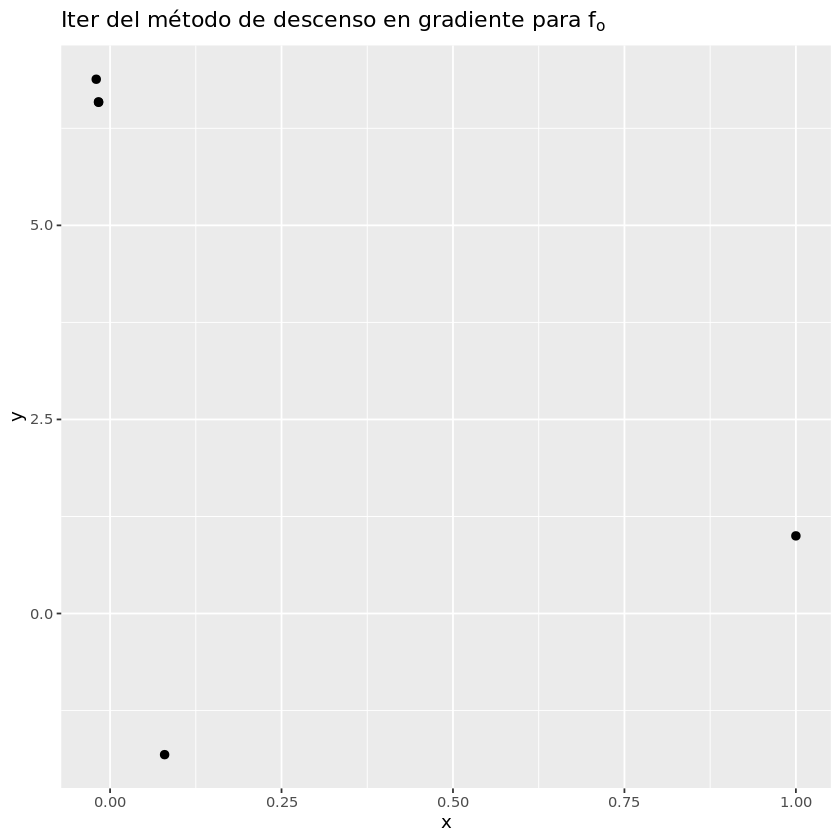

In [79]:
gg +
geom_point(aes(x=beta_plot[1,],y=beta_plot[2,]),size=2) +
#annotate(geom='text', x=0.5, y=0.47, 
#         label=TeX("x^{(0)}", output='character'), parse=TRUE) + 
xlab('x') + ylab('y') + 
ggtitle(TeX('Iter del método de descenso en gradiente para $f_o$'))

**Coordinate descent**

In [80]:
coordinate_descent<-function(f, x_0, tol, 
                        tol_backtracking, x_ast, p_ast, maxiter){
    '
    Method of coordinate descent to numerically approximate solution of min f.
    Args:
        f (expression): definition of function f.
        x_0 (double): vector of initial point for coordinate descent method.
        tol (float): tolerance that will halt method. Controls norm of gradient of f.
        tol_backtracking (float): tolerance that will halt method. Controls value of line search by backtracking.
        x_ast (double): vector solution of min f, now its required that user knows the solution...
        p_ast (double): vector value of f(x_ast), now its required that user knows the solution...
        maxiter (int): maximum number of iterations
    Returns:
        x (double): vector approximation of x_ast.
        iteration (int): number of iterations.
        Err_plot (double): vector array of absolute error between p_ast and f(x) with x approximation.
                          of x_ast. Useful for plotting.
        x_plot (double): vector array that containts in columns vector of approximations. Last column
                        contains x, approximation of solution. Useful for plotting.
    '
    iteration <- 1
    x <- x_0
    
    feval <- f(x)
    gfeval <- gradient_approximation(f,x)

    normgf <- Euclidian_norm(gfeval)
    
    Err_plot_aux <- vector("double",maxiter)
    Err_plot_aux[iteration] <- abs(feval-p_ast)
    
    Err <- compute_error(x_ast,x)
    n <- length(x)
    x_plot <- matrix(0,nrow=n,ncol=maxiter)
    x_plot[,iteration] <- x
    
    cat(sprintf("I    Normagf   Error x_ast   Error p_ast   line search\n"))
    cat(sprintf("%d    %.2e   %0.2e      %0.2e      %s\n",iteration,normgf,Err,Err_plot_aux[iteration],"---"))
    iteration<-iteration + 1
    while(normgf>tol && iteration <= maxiter){
        ind_maximo <- which.max(abs(gfeval))
        e_canonico <- vector("integer",n)
        e_canonico[ind_maximo] <- 1
        dir_desc <- -gfeval[ind_maximo]*e_canonico
        der_direct <- sum(gfeval*dir_desc)
        t <- line_search_by_backtracking(f,dir_desc,x,der_direct)
        x <- x + t*dir_desc
        feval <- f(x)
        gfeval <- gradient_approximation(f,x)
        normgf <- Euclidian_norm(gfeval)
        Err_plot_aux[iteration] <- abs(feval-p_ast);
        x_plot[,iteration] <- x
        Err <- compute_error(x_ast,x)
        cat(sprintf("%d    %.2e   %0.2e      %0.2e      %s\n",iteration,normgf,Err,Err_plot_aux[iteration],t))
        if (t<tol_backtracking){ #if t is less than tol_backtracking then we need to check the reason
            iter_salida <- iteration
            iteration <- maxiter
        }
        iteration <- iteration + 1
    } #while
    cat(sprintf("Error of x with respect to x_ast: %.2e\n",Err))
    cat(sprintf("Approximate solution:"))
    print(x)
    cond <- Err_plot_aux > .Machine$double.eps*10**(-2)
    Err_plot = Err_plot_aux[cond]
    cond<- apply(x_plot,2,function(x) all(x==0))
    x_plot <- x_plot[,!cond]
    if (iteration == maxiter && t < tol_backtracking){
        print("Backtracking value less than tol_backtracking, check approximation")
        iteration<-iter_salida
    }
   list(x,iteration-1,Err_plot,x_plot)
    
}    

In [81]:
beta_0<-c(0,0)

In [82]:
l<-coordinate_descent(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search
1    4.02e+03   1.00e+00      2.16e+02      ---
2    1.60e+02   1.00e+00      9.78e+01      1.52587890625e-05
3    2.83e+01   1.00e+00      9.76e+01      1.52587890625e-05
4    2.70e+03   4.76e-01      8.10e+01      0.125
5    1.07e+02   4.76e-01      2.73e+01      1.52587890625e-05
6    1.37e+01   4.76e-01      2.73e+01      1.52587890625e-05
7    1.29e+03   2.28e-01      2.35e+01      0.125
8    5.20e+01   2.28e-01      1.14e+01      1.52587890625e-05
9    6.95e+00   2.28e-01      1.14e+01      1.52587890625e-05
10    6.16e+02   1.09e-01      1.06e+01      0.125
11    2.54e+01   1.09e-01      7.78e+00      1.52587890625e-05
12    3.15e+00   1.09e-01      7.78e+00      1.52587890625e-05
13    2.94e+02   5.22e-02      7.58e+00      0.125
14    1.17e+01   5.22e-02      6.95e+00      1.52587890625e-05
15    1.51e+00   5.22e-02      6.94e+00      1.52587890625e-05
16    1.41e+02   2.50e-02      6.90e+00      0.125
17    5.60e+00   2.5

In [83]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


In [84]:
print(beta)

[1] -0.01672429  6.58200823


In [85]:
print(beta_ast)

              s0
disp -0.01682177
drat  6.59053287


In [86]:
fo(beta)

[1] 9.777525

In [87]:
beta_plot

0.06136373,0.05895046,0.05895046,0.01768148,0.01930448,0.01930448,-0.0003143712,0.0004724453,0.0004724453,-0.0089231,⋯,-0.0159137,-0.0159137,-0.01640761,-0.01638818,-0.01638818,-0.01662475,-0.01661544,-0.01661544,-0.01672874,-0.01672429
0.00000000,0.00000000,3.45674671,3.45674671,3.45674671,5.09094424,5.0909442439,5.0909442439,5.8722613439,5.8722613,⋯,6.5117229,6.5528649,6.55286485,6.55286485,6.57257038,6.57257038,6.57257038,6.58200823,6.58200823,6.58200823


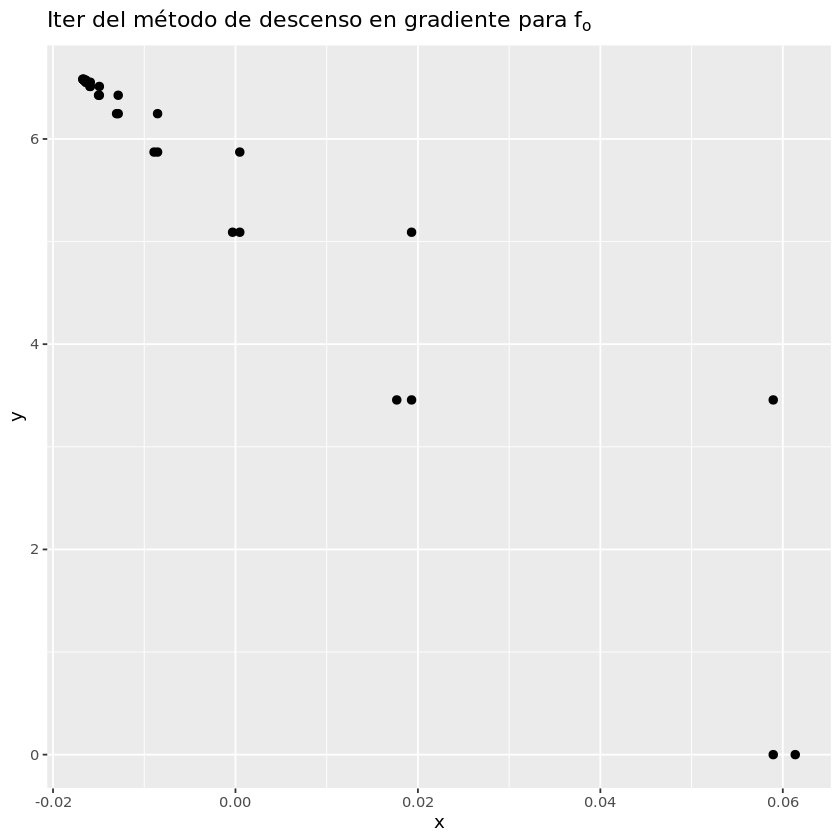

In [88]:
gg +
geom_point(aes(x=beta_plot[1,],y=beta_plot[2,]),size=2) +
#annotate(geom='text', x=0.5, y=0.47, 
#         label=TeX("x^{(0)}", output='character'), parse=TRUE) + 
xlab('x') + ylab('y') + 
ggtitle(TeX('Iter del método de descenso en gradiente para $f_o$'))

**gradient descent**

In [89]:
l<-gradient_descent(fo, beta_0, tol, tol_backtracking, beta_ast, p_ast, maxiter)

I    Normagf   Error x_ast   Error p_ast   line search
1    4.02e+03   1.00e+00      2.16e+02      ---
2    1.61e+02   1.00e+00      9.78e+01      1.52587890625e-05
3    2.83e+01   1.00e+00      9.76e+01      1.52587890625e-05
4    2.04e+02   9.98e-01      9.75e+01      0.00048828125
5    2.86e+01   9.98e-01      9.72e+01      1.52587890625e-05
6    1.28e+02   9.97e-01      9.71e+01      0.000244140625
7    2.79e+01   9.97e-01      9.70e+01      1.52587890625e-05
8    1.61e+02   9.95e-01      9.68e+01      0.00048828125
9    2.81e+01   9.95e-01      9.66e+01      1.52587890625e-05
10    2.04e+02   9.93e-01      9.65e+01      0.00048828125
11    2.85e+01   9.92e-01      9.62e+01      1.52587890625e-05
12    1.28e+02   9.91e-01      9.62e+01      0.000244140625
13    2.78e+01   9.91e-01      9.60e+01      1.52587890625e-05
14    1.61e+02   9.89e-01      9.59e+01      0.00048828125
15    2.80e+01   9.89e-01      9.57e+01      1.52587890625e-05
16    2.04e+02   9.87e-01      9.56e+01      

In [90]:
beta <- l[[1]]
total_of_iterations <- l[[2]]
Err_plot <- l[[3]]
beta_plot <- l[[4]]


In [91]:
print(beta)

[1] 0.06077092 0.17322958


In [92]:
print(beta_ast)

              s0
disp -0.01682177
drat  6.59053287


In [93]:
fo(beta)

[1] 96.44873

In [94]:
beta_plot

0.061363730,0.058936966,0.06184056,0.05875199,0.06062185,0.05871467,0.06096260,0.05853560,0.06144034,0.05835146,⋯,0.05773921,0.06064624,0.05755675,0.05942846,0.05752074,0.05977188,0.05734417,0.05879825,0.0572988,0.06077092
0.001127375,0.001520236,0.01501851,0.01540287,0.02214264,0.02254015,0.03598794,0.03637857,0.04980566,0.05018779,⋯,0.10554322,0.11882906,0.11920678,0.12584056,0.12623143,0.13946746,0.13985148,0.14645937,0.1468536,0.17322958


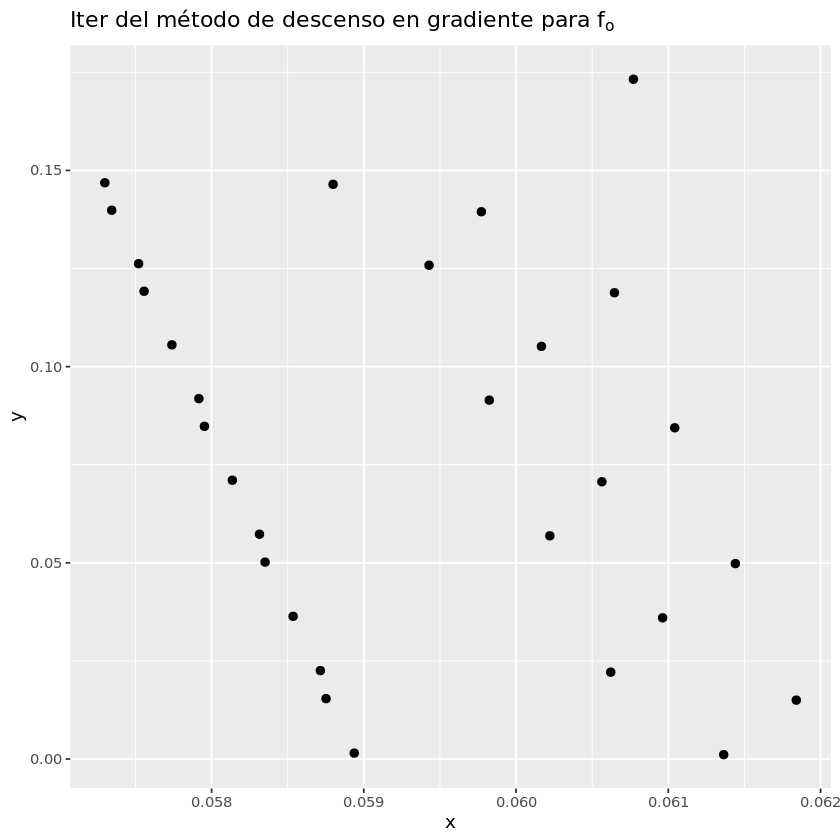

In [95]:
gg +
geom_point(aes(x=beta_plot[1,],y=beta_plot[2,]),size=2) +
#annotate(geom='text', x=0.5, y=0.47, 
#         label=TeX("x^{(0)}", output='character'), parse=TRUE) + 
xlab('x') + ylab('y') + 
ggtitle(TeX('Iter del método de descenso en gradiente para $f_o$'))

**Referencias:**

* Ver [3_minimos_cuadrados](https://github.com/ITAM-DS/Propedeutico/blob/master/Python/clases/3_algebra_lineal/3_minimos_cuadrados.ipynb) para una introducción al problema de mínimos cuadrados con ejemplos en Python3.